In [1]:
# Simple Linear Regression

In [2]:
# code to generate sample data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(9418)

# Number of samples
num_samples = 250

# Generate random data for each feature
experience = np.random.randint(1, 30, size=num_samples)
education_level = np.random.randint(1, 6, size=num_samples)
company_size = np.random.randint(1, 6, size=num_samples)
performance = np.random.randint(1, 6, size=num_samples)
num_skills = np.random.randint(1, 15, size=num_samples)
industry = np.random.randint(1, 6, size=num_samples)
company_age = np.random.randint(1, 100, size=num_samples)
years_in_role = np.random.randint(1, 15, size=num_samples)
leadership_responsibility = np.random.randint(0, 2, size=num_samples)
age = np.random.randint(22, 60, size=num_samples)
remote_work = np.random.randint(0, 2, size=num_samples)

# Introduce non-linear transformations and increase experience influence
package = (
    2.5 * np.log1p(experience) +  # Strong influence of experience with log transformation
    0.2 * np.square(education_level) +
    0.25 * company_size +
    0.3 * performance +
    0.2 * np.sqrt(num_skills) +
    0.1 * np.log1p(industry) +
    0.05 * company_age +
    0.3 * np.log1p(years_in_role) +
    1.5 * leadership_responsibility +
    0.02 * age +
    0.5 * remote_work +
    np.random.normal(0, 1, num_samples)  # Noise
)

# Rescale the package to ensure it fits within the desired LPA range (up to 60 LPA)
package = np.interp(package, (package.min(), package.max()), (2.4, 60))

# Round off the LPA values to 2 decimal places
package = np.round(package, 2)

# Introduce some outliers manually
outliers_indices = np.random.choice(num_samples, size=5, replace=False)
package[outliers_indices] *= np.random.uniform(1.5, 3, size=5)  # Outliers with higher packages

# Ensure the outliers don't exceed 60 LPA
package = np.clip(package, 2.4, 60)

# Create a DataFrame with all features
df = pd.DataFrame({
    'Experience': experience,
    'Education Level': education_level,
    'Company Size': company_size,
    'Performance': performance,
    'Number of Relevant Skills': num_skills,
    'Industry': industry,
    'Company Age': company_age,
    'Years in Current Role': years_in_role,
    'Leadership Responsibilities': leadership_responsibility,
    'Age': age,
    'Remote Work': remote_work,
    'Package (LPA)': package
})
# Optionally, save the data to a CSV file
df.to_csv('company-employee-salary-data.csv', index=False)


| Feature Name              | Description                                                                                                  | Data Type | Range |
|--------------------------|--------------------------------------------------------------------------------------------------------------|-----------|-------|
| `Experience (years)`      | Number of years of professional experience.                                                                    | Integer   | 1-30   |
| `Education Level (1-5)`   | Educational attainment: 1 = High School, 2 = Bachelor's Degree, 3 = Master's Degree, 4 = PhD, 5 = Other      | Integer   | 1-5    |
| `Company Size (1-5)`      | Size of the company: 1 = Small (1-50 employees), 2 = Medium (51-200), 3 = Large (201-1000), 4 = Very Large (1001-5000), 5 = Enterprise (5001+) | Integer   | 1-5    |
| `Performance (1-5)`       | Employee performance rating: 1 = Poor, 5 = Excellent                                                           | Integer   | 1-5    |
| `Number of Relevant Skills`| Number of skills relevant to the job (e.g., programming languages, management skills)                       | Integer   | 1-15   |
| `Industry (1-5)`          | Industry classification: 1 = Tech, 2 = Finance, 3 = Healthcare, 4 = Manufacturing, 5 = Other                | Integer   | 1-5    |
| `Company Age (years)`     | Age of the company in years                                                                                  | Integer   | 1-100  |
| `Years in Current Role`   | Number of years in the current role                                                                         | Integer   | 1-15   |
| `Leadership Responsibilities (0-1)` | Whether the employee has leadership responsibilities: 0 = No, 1 = Yes                                      | Integer   | 0-1    |
| `Age (years)`             | Age of the employee                                                                                          | Integer   | 22-60  |
| `Remote Work (0-1)`       | Whether the employee works remotely: 0 = No, 1 = Yes                                                        | Integer   | 0-1    |
| `Package (salary)`        | The annual salary package of the employee (in Lakhs Per Annum - LPA)                                         | Float     | 2.4-60 |

In [4]:
# load the data
df = pd.read_csv("company-employee-salary-data.csv")

# Display first 5 rows
df.head()

,Experience,Education Level,Company Size,Performance,Number of Relevant Skills,Industry,Company Age,Years in Current Role,Leadership Responsibilities,Age,Remote Work,Package (LPA)
0,16,5,2,3,14,2,54,5,0,31,1,46.40
1,16,1,3,1,7,4,94,8,0,26,0,30.36
2,5,2,5,4,9,5,46,3,0,59,0,16.21
3,22,2,5,5,13,2,97,2,0,58,1,46.54
4,3,2,3,5,13,4,93,12,0,22,1,28.46


In [5]:
print("Total Number of rows : ",df.shape[0])
print("Total Number of columns : ",df.shape[1])

Total Number of rows :  250
Total Number of columns :  12


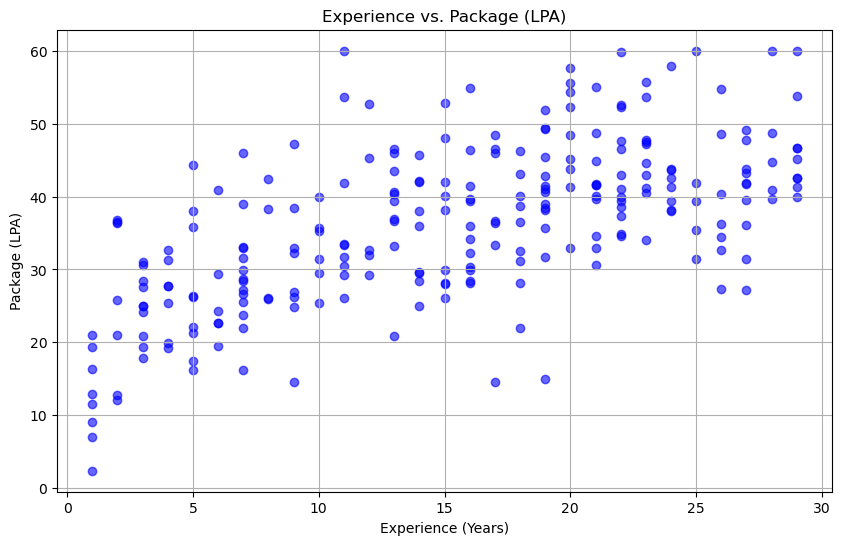

In [6]:
# Plotting Experience vs. Package (LPA)
plt.figure(figsize=(10, 6))
plt.scatter(df['Experience'], df['Package (LPA)'], color='blue', alpha=0.6)
plt.title('Experience vs. Package (LPA)')
plt.xlabel('Experience (Years)')
plt.ylabel('Package (LPA)')
plt.grid(True)
plt.show()

In [7]:

# Calculate and display the correlation between Experience and Package
correlation = df['Experience'].corr(df['Package (LPA)'])
print(f"Correlation between Experience and Package (LPA): {correlation:.2f}")

Correlation between Experience and Package (LPA): 0.63


In [8]:
# Get information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Experience                   250 non-null    int64  
 1   Education Level              250 non-null    int64  
 2   Company Size                 250 non-null    int64  
 3   Performance                  250 non-null    int64  
 4   Number of Relevant Skills    250 non-null    int64  
 5   Industry                     250 non-null    int64  
 6   Company Age                  250 non-null    int64  
 7   Years in Current Role        250 non-null    int64  
 8   Leadership Responsibilities  250 non-null    int64  
 9   Age                          250 non-null    int64  
 10  Remote Work                  250 non-null    int64  
 11  Package (LPA)                250 non-null    float64
dtypes: float64(1), int64(11)
memory usage: 23.6 KB


In [9]:
# Get statistical summaries
df.describe().round(2)

,Experience,Education Level,Company Size,Performance,Number of Relevant Skills,Industry,Company Age,Years in Current Role,Leadership Responsibilities,Age,Remote Work,Package (LPA)
count,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00
mean,15.24,2.86,3.07,3.08,7.61,3.03,48.35,7.36,0.49,40.34,0.51,36.16
std,8.13,1.41,1.43,1.45,4.20,1.39,28.73,3.93,0.50,11.48,0.50,10.96
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,22.00,0.00,2.40
25%,8.00,2.00,2.00,2.00,4.00,2.00,24.00,4.00,0.00,30.00,0.00,28.46
50%,16.00,3.00,3.00,3.00,7.00,3.00,49.00,8.00,0.00,41.00,1.00,36.83
75%,22.00,4.00,4.00,4.00,11.00,4.00,74.00,11.00,1.00,51.00,1.00,43.07
max,29.00,5.00,5.00,5.00,14.00,5.00,99.00,14.00,1.00,59.00,1.00,60.00


In [10]:
# Column Descriptions:
# Experience (years): Number of years of professional experience.
# Education Level (1-5): Educational attainment, where 1 = High School, 2 = Bachelor’s Degree, 3 = Master’s Degree, 4 = PhD, 5 = Other higher education.
# Company Size (1-5): Size of the company, where 1 = Small (1-50 employees), 2 = Medium (51-200 employees), 3 = Large (201-1000 employees), 4 = Very Large (1001-5000 employees), 5 = Enterprise (5001+ employees).
# Performance (1-5): Employee performance rating, where 1 = Poor, 5 = Excellent.
# Number of Relevant Skills: Number of skills relevant to the job (e.g., programming languages, management skills).
# Industry (1-5): Industry classification where 1 = Tech, 2 = Finance, 3 = Healthcare, 4 = Manufacturing, 5 = Other.
# Company Age (years): Age of the company in years.
# Years in Current Role: Number of years in the current role.
# Leadership Responsibilities (0-1): Whether the employee has leadership responsibilities, where 0 = No, 1 = Yes.
# Age (years): Age of the employee.
# Remote Work (0-1): Whether the employee works remotely, where 0 = No, 1 = Yes.
# Package (salary): The annual salary package of the employee.

In [11]:
# Compute the correlation matrix
corr_matrix = df.corr().round(2)
corr_matrix

,Experience,Education Level,Company Size,Performance,Number of Relevant Skills,Industry,Company Age,Years in Current Role,Leadership Responsibilities,Age,Remote Work,Package (LPA)
Experience,1.00,0.10,-0.08,0.13,-0.00,-0.04,0.06,-0.04,0.11,-0.12,-0.01,0.63
Education Level,0.10,1.00,-0.09,0.01,-0.04,-0.06,-0.09,-0.02,-0.07,0.06,0.06,0.48
Company Size,-0.08,-0.09,1.00,-0.01,0.04,-0.02,-0.05,-0.06,-0.06,0.19,-0.10,-0.01
Performance,0.13,0.01,-0.01,1.00,0.06,0.05,-0.13,0.01,-0.06,-0.08,0.08,0.14
Number of Relevant Skills,-0.00,-0.04,0.04,0.06,1.00,0.01,-0.03,0.01,-0.01,0.01,0.11,0.02
Industry,-0.04,-0.06,-0.02,0.05,0.01,1.00,-0.00,0.01,-0.01,0.10,-0.08,-0.06
Company Age,0.06,-0.09,-0.05,-0.13,-0.03,-0.00,1.00,0.02,-0.01,-0.03,-0.12,0.39
Years in Current Role,-0.04,-0.02,-0.06,0.01,0.01,0.01,0.02,1.00,-0.11,-0.07,0.08,-0.04
Leadership Responsibilities,0.11,-0.07,-0.06,-0.06,-0.01,-0.01,-0.01,-0.11,1.00,-0.09,0.01,0.20
Age,-0.12,0.06,0.19,-0.08,0.01,0.10,-0.03,-0.07,-0.09,1.00,-0.09,0.00


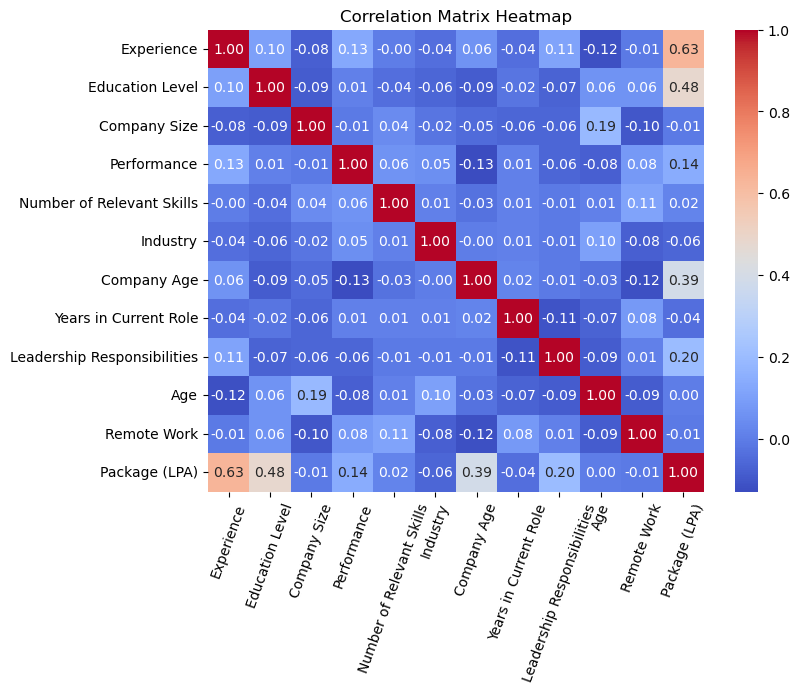

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=70)
plt.show()

In [13]:
# Check for missing values
df.isnull().sum()


Experience                     0
Education Level                0
Company Size                   0
Performance                    0
Number of Relevant Skills      0
Industry                       0
Company Age                    0
Years in Current Role          0
Leadership Responsibilities    0
Age                            0
Remote Work                    0
Package (LPA)                  0
dtype: int64

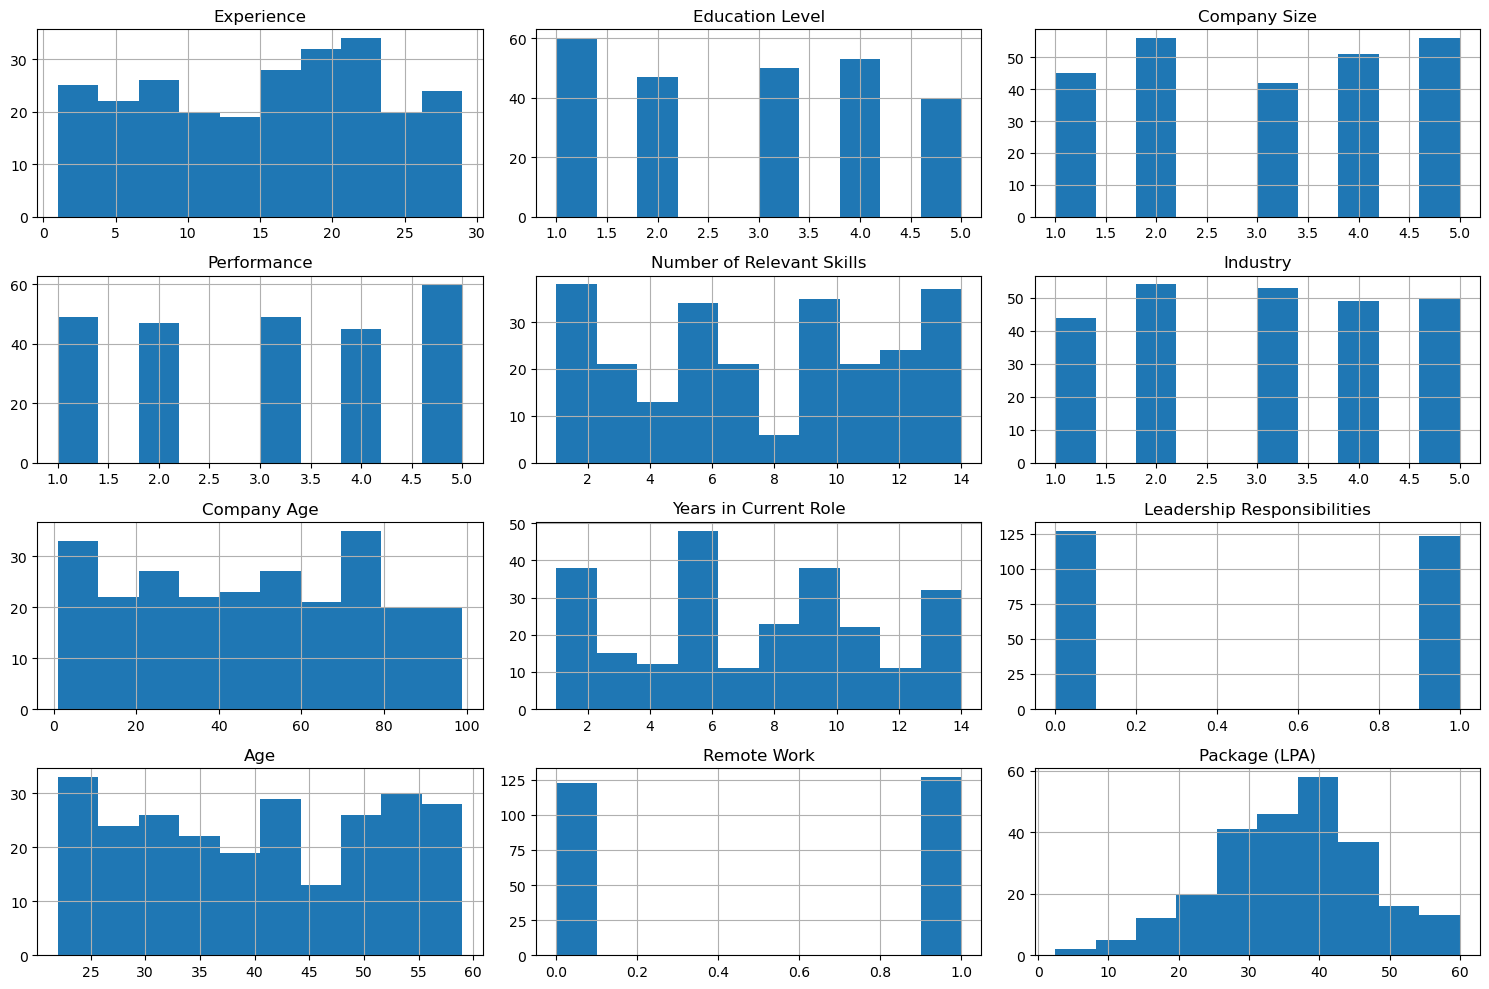

In [14]:
# Histograms for all numerical features
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


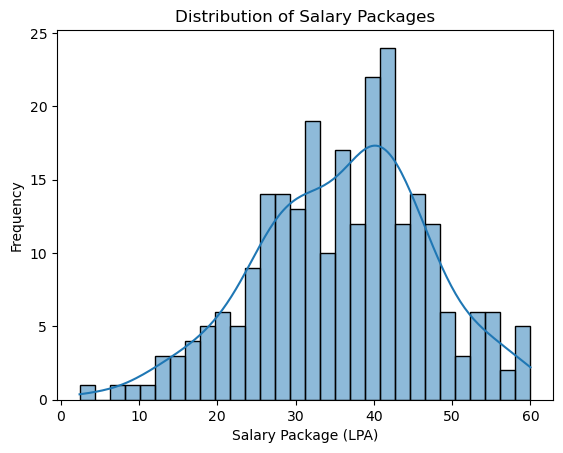

In [15]:
import seaborn as sns
# Distribution of the salary package, plotting histogram
sns.histplot(df['Package (LPA)'], bins=30, kde=True)
plt.title('Distribution of Salary Packages')
plt.xlabel('Salary Package (LPA)')
plt.ylabel('Frequency')
plt.show()


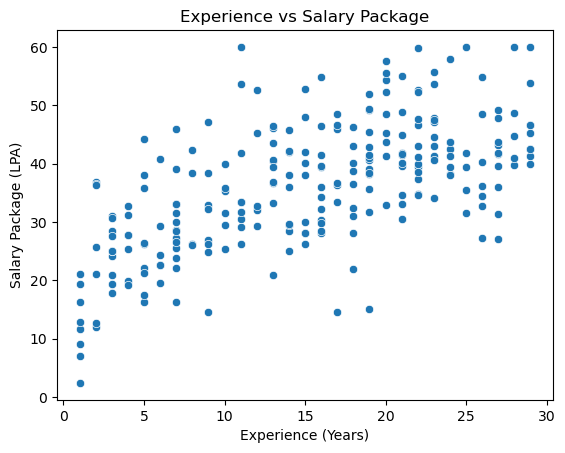

In [16]:
# Scatter plot between Experience and Package
sns.scatterplot(x='Experience', y='Package (LPA)', data=df)
plt.title('Experience vs Salary Package')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary Package (LPA)')
plt.show()


In [17]:
# Define the feature and target variable
X = df[['Experience']]  # Predictor (input feature)
y = df['Package (LPA)']  # Target variable (output feature)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 86.60
R-squared: 0.20


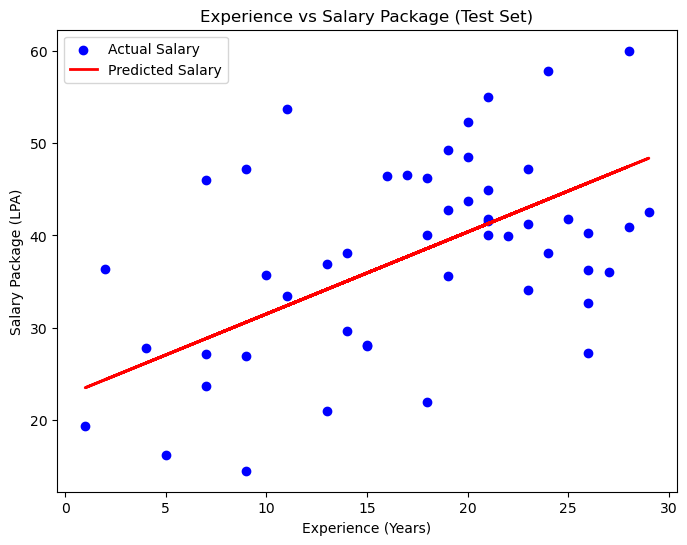

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Salary')
plt.title('Experience vs Salary Package (Test Set)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary Package (LPA)')
plt.legend()
plt.show()

In [23]:
slope = model.coef_[0]
intercept = model.intercept_
print(f'Coefficient (Slope): {slope:.2f}')
print(f'Intercept: {intercept:.2f}')

Coefficient (Slope): 0.89
Intercept: 22.62
